# 1. DIMENSIONALITY REDUCTION AND FEATURE EXTRACTION

## 1.1 PRINCIPAL COMPONENT ANALYSIS (PCA)
Pytnon implementation (sklearn):
https://scikit-learn.org/stable/modules/decomposition.html#pca




Linear coordinate transformation in which the new axis correspond to the directions in which the data presents more dispersion. The procedure is the following:

- $A$: data matrix of size $mxn$ (m observations x n variables).
- Demean the data: $(A-\bar{A})$.
- Obtain the $n \times n$ covariance matrix of the data: $C = \frac{1}{n-1}(A-\bar{A})^T(A-\bar{A})$.
- Diagonalize C: $C \cdot \vec{v}_i = \lambda_i \vec{v}_i, i = 1,\dots,n$. Eigenvectors $\vec{v}_i$ correspond to the coordinates of the PCA space. Eigenvalues $\lambda_i$ correspond to variance of the original data explained by each component. 
- Variance explained by the principal component $\vec{v}_i$ is: $\frac{\lambda_i}{\sum_i^n\lambda_i}$
- Project data into the new PCA space. Projection into the ith component: $P_i = A \cdot \vec{v}_i$


### 1.1.1 PCA in a simple data set:

We create a 2-dimensional data set that has only 5 observations to better understand the procedure and the PCA geometry:


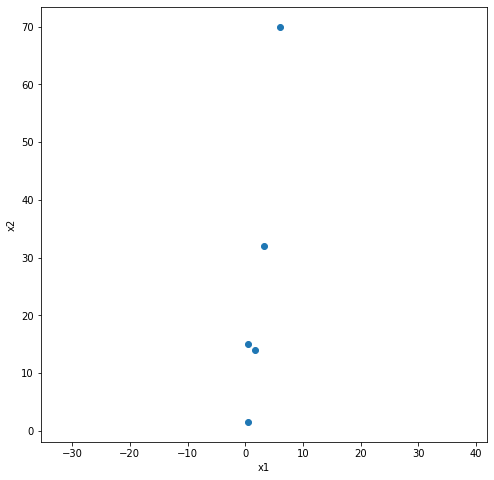

In [ ]:
import numpy as np
import matplotlib.pylab as plt
D = np.array([[1.6,14],[3.2,32],[6,70],[0.5,1.5],[0.5,15]])

fig = plt.figure(figsize=(8,8))
plt.scatter(D[:,0],D[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

In [ ]:
D.shape

(5, 2)

Normalize data

In [ ]:
DS = (D-D.mean(axis=0))/D.std(axis=0) # estandarizar los datos

# it's equivalent to: 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler
DS1 = StandardScaler().fit_transform(D)

# check it:
print('Both ways are equivalent: {}'.format((DS-DS1).sum()))

Both ways are equivalent: 0.0


Apply PCA to standardized data

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(DS)

In [ ]:
100*pca.explained_variance_ratio_

array([98.72222616,  1.27777384])

Check the variance explained by each component by looking at the eigenvalues:

In [ ]:
100*pca.explained_variance_ratio_.cumsum()

array([ 98.72222616, 100.        ])

The first PCA component explains 98% of the variability of the data

We visualize the principal components (eigenvectors):

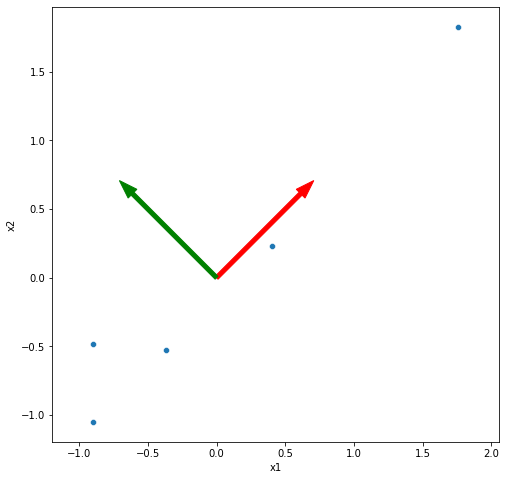

In [ ]:
import pandas as pd
import seaborn as sns

vec = pca.components_ # eigenvectors

dfpcas = pd.DataFrame(DS[:,0:2],columns=['x1', 'x2'])

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x="x1", y="x2",data=dfpcas)
plt.arrow(0,0,vec[0][0],vec[0][1],shape='full',fc='r', ec='r', length_includes_head = True, width=0.03)
plt.arrow(0,0,vec[1][0],vec[1][1],shape='full',fc='g', ec='g', length_includes_head = True, width=0.03)
plt.axis('equal')
plt.show()


We check that the eigenvectors are orthogonal:


In [ ]:
np.dot(vec[0],vec[1])

0.0

Dimensionality reduction: we project the original data to the first PCA axis

In [ ]:
Xproj = pca.transform(DS)
XPCA = Xproj[:,0]
XPCA.shape
XPCA

array([-0.63057835,  0.45005542,  2.53415249, -1.37722537, -0.97640419])

In [ ]:
Xproj.shape

(5, 2)

### PCA using numpy libraries: 

In [ ]:
M = np.cov(DS.T) # Sample covariance matrix: M = [(A-mean(A))'-(A-mean(A))] 
M.shape # should be nvariables x nvariables (in this example, 2x2)

(2, 2)

Perform the diagonalization of the covariance matrix

In [ ]:
eigval, eigvec = np.linalg.eig(M)


Check the eigenvalues 

In [ ]:
print('Eigenvalues using sklearn {}'.format(pca.explained_variance_))
print('Eigenvalues using numpy {}'.format(eigval))


Eigenvalues using sklearn [2.46805565 0.03194435]
Eigenvalues using numpy [2.46805565 0.03194435]


Now check the eigenvectors:

In [ ]:
print('Eigenvectors using sklearn {}'.format(pca.components_))
print('Eigenvectors using numpy {}'.format(eigvec))


Eigenvectors using sklearn [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigenvectors using numpy [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


### 1.1.2 PCA of the iris dataset

Load dataset:

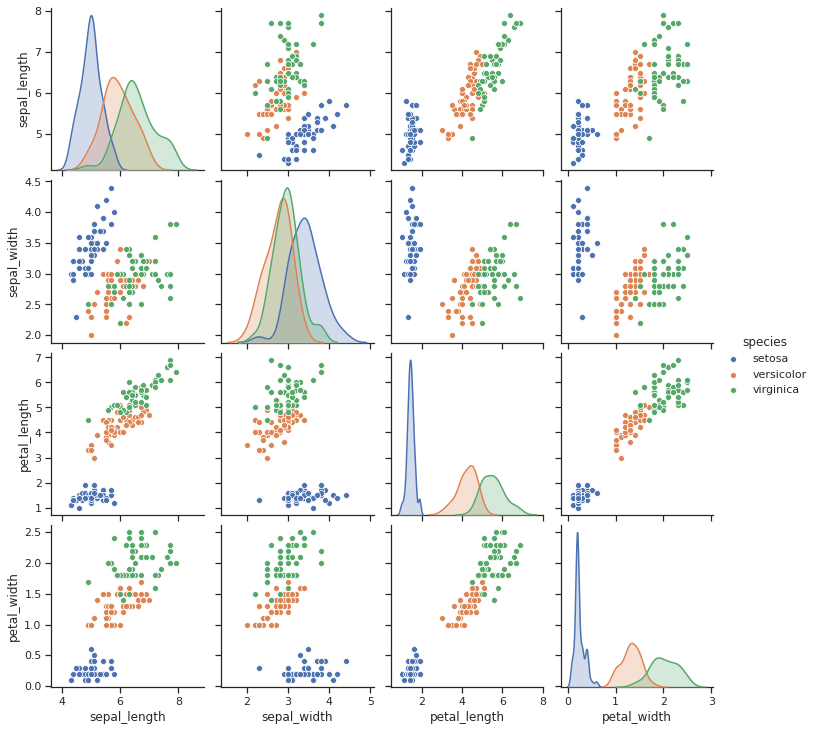

In [ ]:
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Split attributes and class labels:

In [ ]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']] # features
y = iris['species'] # class labels

Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

In [ ]:
XS.shape

(150, 4)

PCA to scaled data:

In [ ]:
pca = decomposition.PCA(n_components=4).fit(XS)

Projection of data into the PCA space

In [ ]:
Xproj = pca.transform(XS)
Xproj.shape

(150, 4)

Principal components and explained variance

In [ ]:
print('eigenvalues = {} {} {} {}'.format(*pca.explained_variance_))
print('Explained variance = {} {} {} {}'.format(*pca.explained_variance_ratio_))

eigenvalues = 2.9380850501999953 0.9201649041624882 0.14774182104494799 0.02085386217646228
Explained variance = 0.7296244541329986 0.22850761786701781 0.03668921889282874 0.005178709107154798


Explained variance

In [ ]:
100*pca.explained_variance_ratio_.cumsum()

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

Project the data in a space of reduced dimensionality:

Projection of the original 4D data to the 2D PCA space, since the two principal components with largest eigenvalues capture 95.81% of the variance in the data

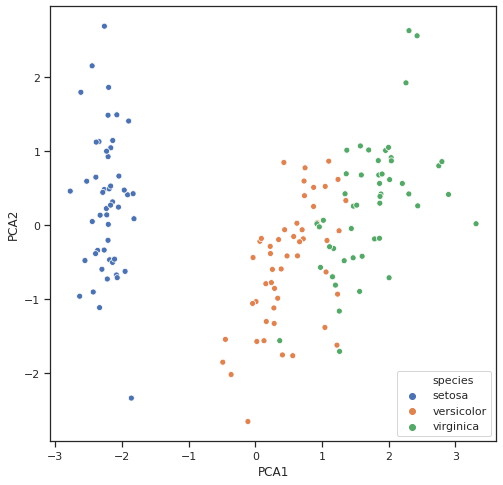

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

dfpca = pd.DataFrame(Xproj[:,0:2],columns=['PCA1', 'PCA2'])

fig = plt.figure(figsize=(8,8))

ax = sns.scatterplot(x="PCA1", y="PCA2", hue=y,data=dfpca)
plt.show()

In [ ]:
Xproj[:,0:2].shape

(150, 2)

Represent the addresses of the two main components:

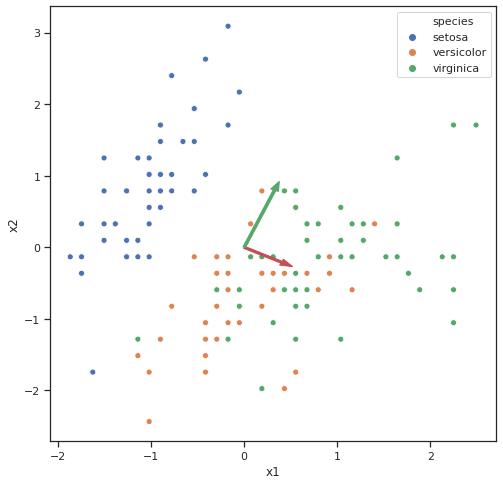

In [ ]:
# original data (scaled)
dfpcas = pd.DataFrame(XS[:,0:2],columns=['x1', 'x2'])

vec = pca.components_ # eigenvectors


fig = plt.figure(figsize=(8,8))
sns.scatterplot(x="x1", y="x2", hue=y,data=dfpcas)
plt.arrow(0,0,vec[0][0],vec[0][1],shape='full',fc='r', ec='r', length_includes_head = True, width=0.03)
plt.arrow(0,0,vec[1][0],vec[1][1],shape='full',fc='g', ec='g', length_includes_head = True, width=0.03)
plt.show()

**Exercise**: Apply PCA to mpg dataset (cars)
- Apply PCA
- What proportion of the data variability explains each PCA component
- How many PCA components are necessary to explain 90% of the variability
- Project the data to the space of reduced dimensionality


original dataset size = (398, 9)
numerical features dataset size = (398, 7)
numerical dataset without NaNs = (392, 7)
varianza explicada acumulada =[ 71.58051179  83.94610315  94.35172845  96.97908694  98.72074871
  99.49585101 100.        ]
Dimensionalidad datos en espacio PCA reducido = (392, 3)


NameError: ignored

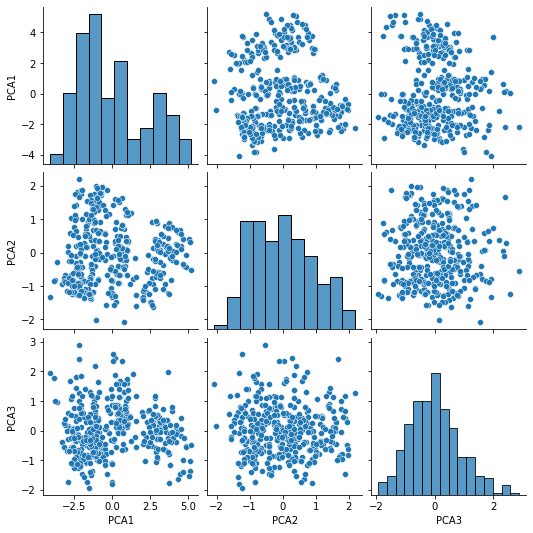

In [1]:
import pandas as pd 
import seaborn as sns
mpg = sns.load_dataset("mpg") # load dataset

mpg_num = mpg.select_dtypes(include='number') # keep only numeric variables 
mpg_num_nonans = mpg_num.dropna() # remove observations with NaNs

print('original dataset size = {}'.format(mpg.shape))
print('numerical features dataset size = {}'.format(mpg_num.shape))
print('numerical dataset without NaNs = {}'.format(mpg_num_nonans.shape))

X = mpg_num_nonans
y = mpg['origin'] # use origin as class label (not needed in PCA)

# scale data:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

# PCA decomopositon:
from sklearn import decomposition
n_variables = mpg_num.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)

# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

# project data into PCA space:
Xproj = pca.transform(XS)

# Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA:
ndim_reducida = 3 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3'])
sns.pairplot(d)
plt.show()

In [ ]:
mpg_num.shape[1]

7

### 1.1.3 Why it is important to scale the data in PCA?

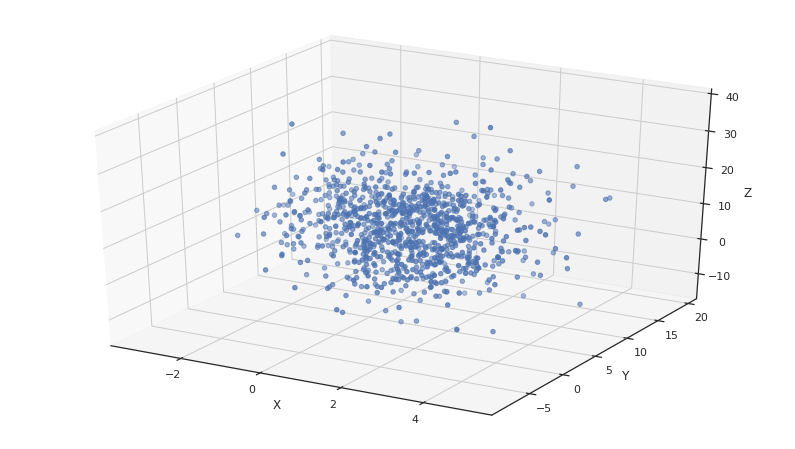

PCA without scaling: [0.721 0.255 0.024]
PCA with scaling: [0.388 0.333 0.279]


In [ ]:
from numpy import *
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
set_printoptions(precision = 3)

# Datos: distribución normal multivariada en 3d con diferentes std en cada dirección
mean = [1,5,10]
cov = [[2,-1,0],[-1,20,-1],[0,-1,60]]
d = random.multivariate_normal(mean,cov,1000)

# ANALISIS PCA:
# Estandarizacion de los datos ( d1 = (d - d.mean(0))/d.std(0) ):
from sklearn import preprocessing
d1 = preprocessing.scale(d)

# representación gráfica de los datos:
fig = plot.figure(1,figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d[:,0],d[:,1],d[:,2])
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
plot.show()

import numpy as np
from sklearn.decomposition import PCA
pca1 = PCA(n_components=3)
pca1.fit(d)
X = pca1.transform(d)
print('PCA without scaling:',format(pca1.explained_variance_ratio_))

pca2 = PCA(n_components=3)
pca2.fit(d1)
X = pca2.transform(d1)
print('PCA with scaling:',format(pca2.explained_variance_ratio_))

When performing a PCA with the unscaled data, the first PCA component explains a variability of the data of 74%. This is not because the variables present correlations that allow reducing the dimensionality of the data (the 3D scatter shows that they are clearly uncorrelated), but rather because the three variables present totally different ranges. It is more sensible to scale the data, and we see that the PCA of the scaled data has three components, each accounting for about a third of the variability in the data.

In [ ]:
d.shape

(1000, 3)

In [ ]:
d.mean(axis=0)

array([ 1.037,  4.932, 10.16 ])

If the data is not scaled, one of the components might explain much of the variation in the data due to differences in the variable ranges. When data have different units or scales, this is an important thing to keep in mind.

### 1.1.4 PCA with synthetic data

This example shows that PCA allows dimensionality to be reduced in cases where some of the variables (x3, x4) are highly correlated with others (x1, x2).

array([5.419e+01, 4.581e+01, 3.940e-30, 2.389e-31])

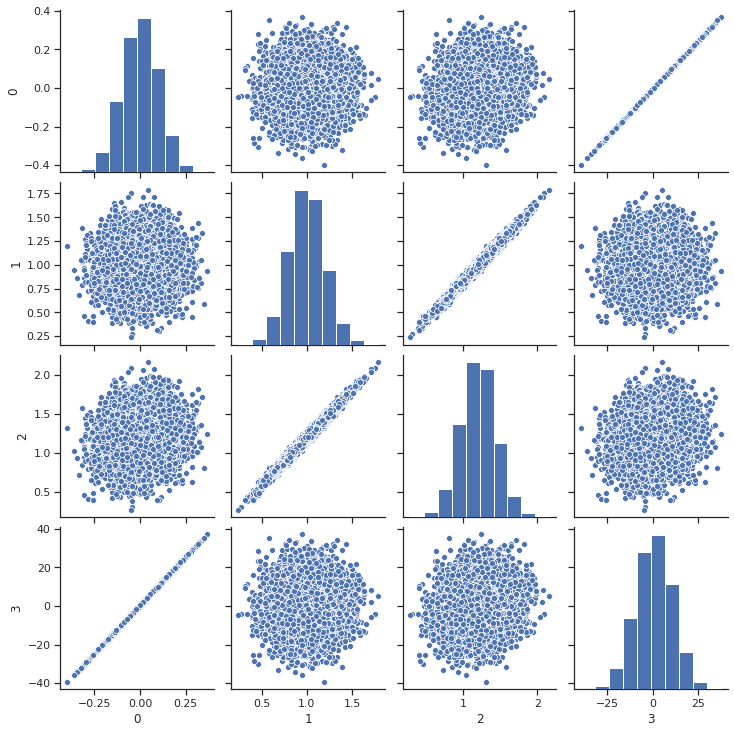

In [ ]:
from random import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import decomposition
from sklearn import datasets

plt.close()
# random vectors x1 and x2

mu1, sigma1 = 0, 0.1
mu2, sigma2 = 1, 0.2

x1 = np.random.normal(mu1, sigma1, 10000)
#plt.plot(x1)
#plt.show()
x2 = np.random.normal(mu2, sigma2, 10000)
# creation of x3 and x4
x3 = 0.3*x1+1.2*x2
x4 = 100*x1+0.4*x2

# data matrix
M=np.transpose([x1, x2, x3, x4]) #simply creats the matrix
data=pd.DataFrame(data=M) # and now it transforms it into a usefull data matrix
sns.pairplot(data)

# escalamos los datos:
datas = preprocessing.scale(data)

#scatter matrix
# PCA analysis
pca = decomposition.PCA(n_components=4)
pca.fit(datas)
data_proj = pca.transform(datas)

100*pca.explained_variance_ratio_

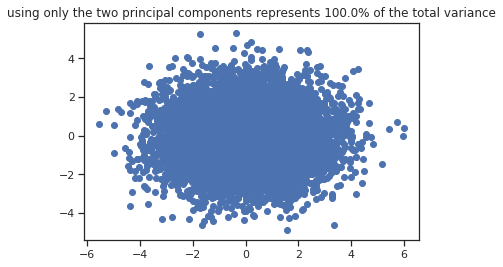

In [ ]:
plt.figure()
t = pca.explained_variance_ratio_
plt.title(str("using only the two principal components represents "+str(1/100*int(10000*(t[0]+t[1])))+"% of the total variance"))
plt.scatter(data_proj[:,0], data_proj[:,1])
plt.show()

### 1.1.5 PCA with images: EIGENFACES 
https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html


In [ ]:
# Cargar librerias necesarias:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Obtener las imágenes de la base de datos:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# ontener numero de imagenes y tamaño:
n_samples, h, w = lfw_people.images.shape


In [ ]:
print('hay {} imagenes de tamaño {} x {}'.format(n_samples,h,w))

hay 1288 imagenes de tamaño 50 x 37


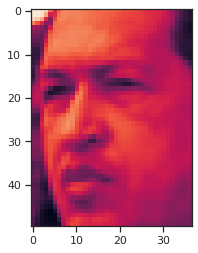

In [ ]:
plt.imshow(lfw_people.images[0,:,:])
plt.show()

In [ ]:
n_observaciones = n_samples

In [ ]:
n_variables = h*w

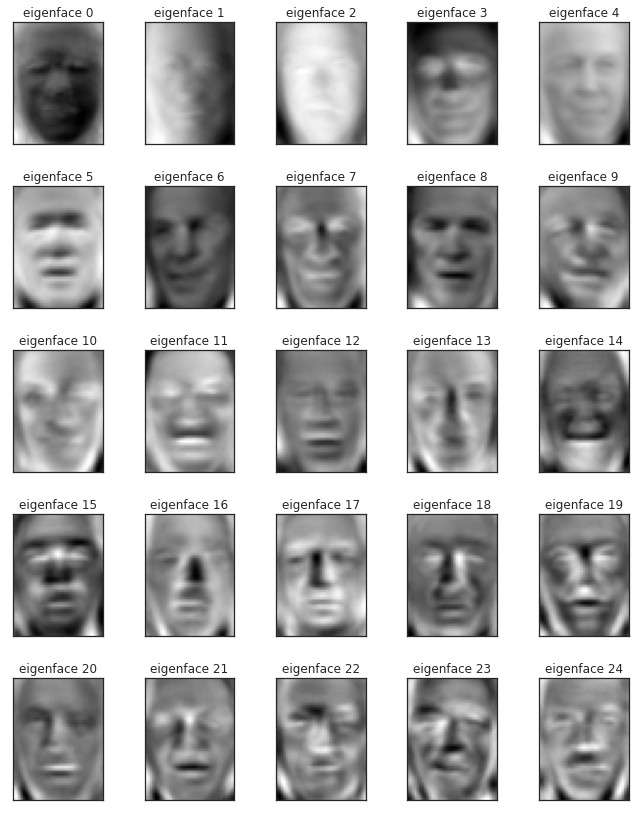

In [ ]:

# Cargar los datos:
X = lfw_people.data

# numero de variables del espacio PCA reducido:
n_components = 150

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)
eigenfaces = pca.components_.reshape((n_components, h, w))

# Representar las eigenfaces más representativas:
n_row=5
n_col=5
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenfaces[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(eigenface_titles[i], size=12)
    plt.xticks(())
    plt.yticks(())
plt.show()

## 1.2 FEATURE SELECTION METHODS

https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

### 1.2.1. Correlation heatmap:

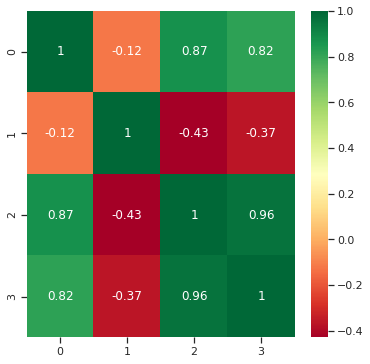

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

data = pd.DataFrame(X)
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### 1.2.2 K best feature selector:

Select features according to the k highest scores of a certain test: In this example, the method computes chi-squared stats between each non-negative feature and class.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.


Other methods available as a performance scores:
- f_classif
ANOVA F-value between label/feature for classification tasks.

- mutual_info_classif
Mutual information for a discrete target.

- chi2
Chi-squared stats of non-negative features for classification tasks.

- f_regression
F-value between label/feature for regression tasks.

- mutual_info_regression
Mutual information for a continuous target.

- SelectPercentile
Select features based on percentile of the highest scores.

- SelectFpr
Select features based on a false positive rate test.

- SelectFdr
Select features based on an estimated false discovery rate.

- SelectFwe
Select features based on family-wise error rate.

- GenericUnivariateSelect
Univariate feature selector with configurable mode.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(150, 1)

### 1.2.3 Recursive Feature Elimination: 

Given a set of training features and a classifier, the method recursively evaluates the performance of the method when removing some features and finally provides a reduced set of features that provide minimum loss of performance:

Data shape: (1797, 64)
Mantained features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False False False  True False
 False False False False False  True False False False False False False
 False False False False]


<Figure size 720x720 with 0 Axes>

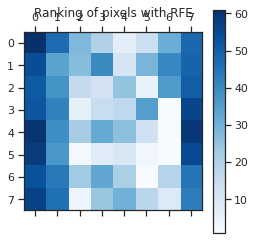

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
# The database contains 1797 Images of size 8x8 pixels
# Each of the 64 pixels is a feature
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target
print('Data shape: {}'.format(X.shape))

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1) 
# clf = tree.DecisionTreeClassifier()
rfe = RFE(estimator=svc, n_features_to_select=4, step=1)
rfe.fit(X, y)
print('Mantained features: {}'.format(rfe.support_))

# Relevance of each of the pixels represented as a 8x8 image:
# darker pixels at the borders can be discarded since do not improve the classifier's performance during training
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking (the lower, the more relevant the feature)
fig = plt.figure(figsize=(10,10))
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

**Exercise:**

Apply RFE to the iris data to check if it chooses the same two variables that a human would choose by looking at the pairplot with different colors for each class:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create the RFE object and rank each variable
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(X, y)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

Kept features: [False False  True  True]
Raking of the features: [3 2 1 1]


** Exercise:**
Apply RFE to the numeric variables of the mpg dataset:

In [ ]:
import pandas as pd 
import seaborn as sns
mpg = sns.load_dataset("mpg") # load dataset

mpg_nonans = mpg.dropna() # remove observations with NaNs
mpg_num = mpg_nonans.select_dtypes(include='number') # keep only numeric variables 

X = mpg_num
y = mpg_nonans['origin'] # use origin as class label (not needed in PCA)

# Create the RFE object and rank each variable
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

Kept features: [False  True False False False False False]
Raking of the features: [6 1 4 5 7 3 2]


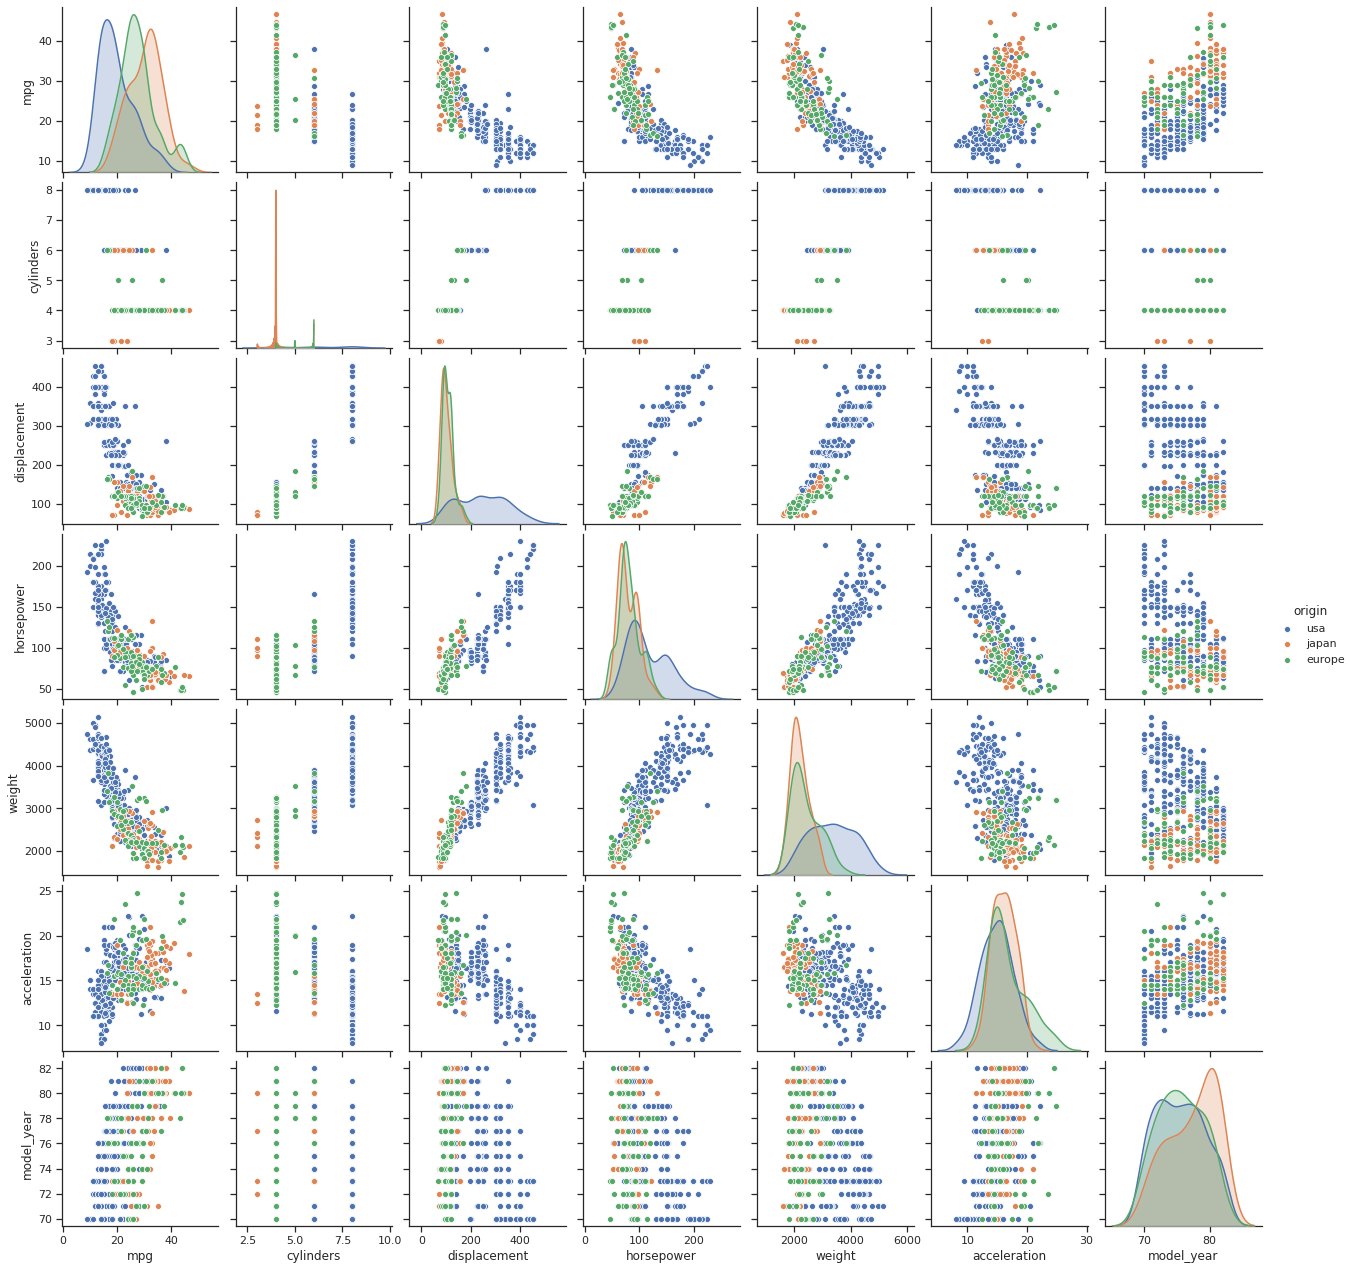

In [ ]:
sns.pairplot(mpg_nonans,hue='origin')
plt.show()

## 1.3 VISUALIZATION OF HIGH-DIMENSIONAL DATA 

Low-dimensional projection of high-dimensional data.

###1.3.1 Multidimensional Scaling, MDS): 

This technique projects multidimensional data into a lower dimension space by keeping relative distances between observations. The procedure applies an iterative opitmization scheme in order to obtain the optimal projection function. 

- Multidimensional Scaling (MDS) projects high dimensional data to a low-dimensionality space (typically 2D or 3D) {\bf keeping relative distances between observations}.
- Find a transformation satisfying $d_{ij}^k \approx f(d_{ij}^M)$, where 
$d_{ij}^M$ are pariwise distances between observations $(i,j)$ in the original M-dimensional space and $d_{ij}^k$ are distances in the low k-dimensional space ($k \ll M$). 
- MDS finds the transformation $f$ by minimizing the objective function:
\begin{equation*}
S(d_{ij}^k) = \sqrt{\frac{\sum_i \sum_j [f(d_{ij}^M)-d_{ij}^k]^2)]}{\sum_i \sum_j (d_{ij}^k)^2)}}
\end{equation*}

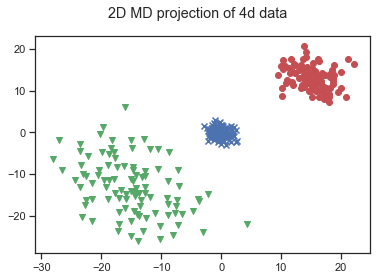

In [ ]:
import numpy as np
import pylab as py

from sklearn import manifold
from sklearn.metrics import euclidean_distances

seed = np.random.RandomState(seed=3)

# Generate 4d random synthetic data (N variables x M observations):
N = 4
M = 300

M3 = int(round(M/3))
X1 = 10 + 2*np.random.randn(M3,N) # cluster 1 (medium dispersion)
X2 = -10 + 5*np.random.randn(M3,N) # cluster 2 (high dispersion)
X3 = 1*np.random.randn(M3,N) # cluster 3 (low dispersion)

A = np.concatenate((X1,X2,X3))

# Apply MDS algorithm:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
similarities = euclidean_distances(A)
pos = mds.fit(similarities).embedding_

# Represent data in the 2D MDS projection:
fig1 = py.figure()
for i in range(0,M3,1):
    py.scatter(pos[i][0],pos[i][1],marker='o',c='r')
for i in range(M3,2*M3,1):
    py.scatter(pos[i][0],pos[i][1],marker='v',c='g')
for i in range(2*M3,M,1):
    py.scatter(pos[i][0],pos[i][1],marker='x',c='b')
fig1.suptitle('2D MD projection of 4d data')
py.show()

### 1.3.2 t-distributed Stochastic Neighbor Embedding (t-SNE):

A nonlinear projection of in a low dimensional space. The mapping is obtained by minimizing the Kullback-Leibler divergence between the joint probabilities of the low-dimensional projection and the high-dimensional observations. 

Let's consider a set of N d-dimensional observations $\{\vec{x}_1, \vec{x}_2, \cdots, \vec{x}_N\}$. 

We model the conditional probability that $\vec{x}_j$ is taken as neighbor of $\vec{x}_i$ by a normal distribution centered at $\vec{x}_i$:

$p_{j|i} = \frac{\exp\{-|\vec{x}_i-\vec{x}_j|^2/2\sigma^2_j\}}{\sum_{k\neq i} \exp\{-|\vec{x}_i-\vec{x}_j|^2/2\sigma^2_j\}}$

That converts similarities between data points to joint probabilities 

$p_{ij} = \frac{1}{2N}(p_{j|i}+p_{i|j})

The low-dimensional map is then defined as a sequence of N points in a lower-dimension \tilde{d} $\{\vec{y}_1, \vec{y}_2, \cdots, \vec{y}_N\}$. Let's define an equivalent joint probability at the low-dimensional space as

$q_{ij} = \frac{(1+|\vec{x}_i-\vec{x}_j|^2)^{-1}}{\sum_{k}\sum_{l\neq k}(1+|\vec{x}_k-\vec{x}_l|^2)^{-1}}$
 
 
The map is found by minimizing the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data

$KL(P|Q) = \sum_{i \neq j} p_{ij} log \frac{p_{ij}}{q_{ij}}$


In order to get familiar with the parameters and to get some insight about how to use this techinque please refer to 

https://distill.pub/2016/misread-tsne/

https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py





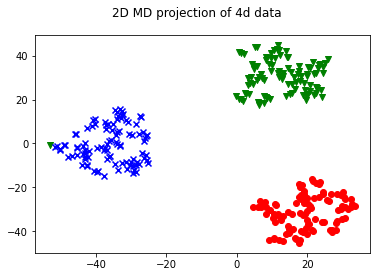

In [5]:
import numpy as np
import pylab as py

from sklearn import manifold
from sklearn.metrics import euclidean_distances

seed = np.random.RandomState(seed=3)

# Generate 4d random synthetic data (N variables x M observations):
N = 4
M = 300

M3 = int(round(M/3))
X1 = 10 + 2*np.random.randn(M3,N) # cluster 1 (medium dispersion)
X2 = -10 + 5*np.random.randn(M3,N) # cluster 2 (high dispersion)
X3 = 1*np.random.randn(M3,N) # cluster 3 (low dispersion)

A = np.concatenate((X1,X2,X3))

# Apply t-SNE algorithm:
n_components = 2
perplexity = 10
tsne = manifold.TSNE(n_components=n_components, init='random', random_state=0, perplexity=perplexity)
pos = tsne.fit_transform(A)

# Represent data in the 2D MDS projection:
fig1 = py.figure()
for i in range(0,M3,1):
    py.scatter(pos[i][0],pos[i][1],marker='o',c='r')
for i in range(M3,2*M3,1):
    py.scatter(pos[i][0],pos[i][1],marker='v',c='g')
for i in range(2*M3,M,1):
    py.scatter(pos[i][0],pos[i][1],marker='x',c='b')
fig1.suptitle('2D MD projection of 4d data')
py.show()

## 1.4 INDEPENDENT COMPONENT ANALYSIS (ICA)
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html


- Consider two independent systems A and B that are represented by two time signals $s_A(t)$ and $s_B(t)$.
- The two signals get mixed in a unknown proportion (matrix A, size 2x2). 
- We measure the mixed signals $x_1(t)$ and $x_2(t)$. 

Question: Can we infer the form of the two source signals $s_A(t)$ and $s_B(t)$ only from $x_1(t)$ and $x_2(t)$?.

Answer: Yes, we can {\em if the two systems are statistically independent}. 

How?: Independent Component Analysis (ICA).


<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

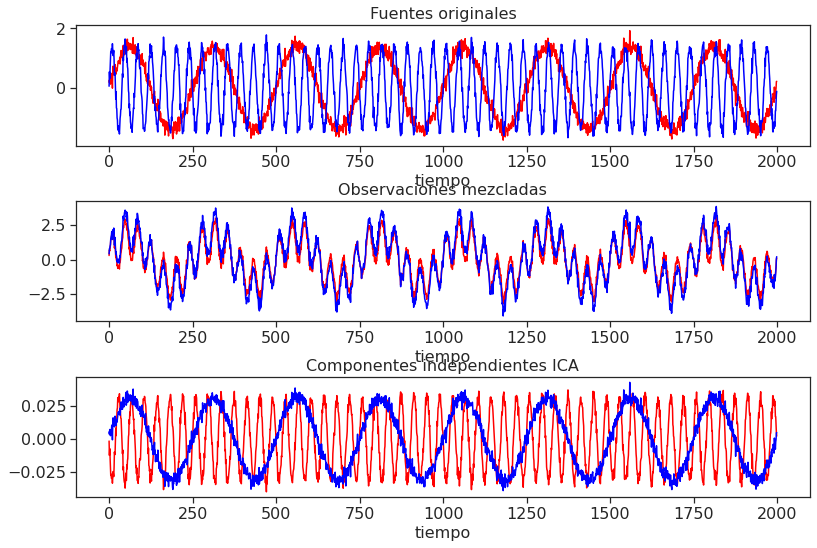

In [ ]:
import numpy as np
import pylab as py
import scipy as sc
from sklearn.decomposition import FastICA

# Generar señales sinteticas:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Fuentes originales:
s1 = np.sin(2 *np.pi* time)  # Signal 1 : sinusoidal signal
s2 = np.sin(13 *np.pi* time)  # Signal 1 : sinusoidal signal

S = np.c_[s1, s2]

# Añadir ruido:
S += 0.1 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Estandarizar datos
# Mezclar señales:
A = np.array([[1, 1], [1.5, 1.0]])  # Matriz de mezcla
X = np.dot(S, A.T)  # Observaciones mezcladas

# Descomposicion ICA :
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Reconstruccion ICA

# representacion de resultados :
plt.figure()
plt.figure(figsize=(20,20))

models = [S, X, S_]
names = ['Fuentes originales','Observaciones mezcladas',
         'Componentes independientes ICA']
colors = ['red', 'blue', 'green']

fig = plt.figure(figsize=(12,10))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name, size=16)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
        plt.xlabel('tiempo', fontsize=16) 
        plt.tick_params(labelsize=16)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()